In [2]:
from sklearn.datasets import  load_breast_cancer

bc = load_breast_cancer()

In [3]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset Info

In [4]:
bc.target[500]

1

In [5]:
bc.target.shape

(569,)

In [6]:
bc.data[550]

array([1.086e+01, 2.148e+01, 6.851e+01, 3.605e+02, 7.431e-02, 4.227e-02,
       0.000e+00, 0.000e+00, 1.661e-01, 5.948e-02, 3.163e-01, 1.304e+00,
       2.115e+00, 2.067e+01, 9.579e-03, 1.104e-02, 0.000e+00, 0.000e+00,
       3.004e-02, 2.228e-03, 1.166e+01, 2.477e+01, 7.408e+01, 4.123e+02,
       1.001e-01, 7.348e-02, 0.000e+00, 0.000e+00, 2.458e-01, 6.592e-02])

In [7]:
bc.data.shape

(569, 30)

# Preprocessing

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [9]:
print(f"Feature=> train: {X_train.shape} - test: {X_test.shape}")
print((f"Label=>{y_train.shape} - test{y_test.shape}"))

Feature=> train: (455, 30) - test: (114, 30)
Label=>(455,) - test(114,)


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f"acc train:{acc_train} - acc test:{acc_test} - precision:{p} - recall:{r}")

    return acc_train, acc_test, p, r

## Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [13]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict((X_test))

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9384615384615385 - acc test:0.9210526315789473 - precision:0.9466666666666667 - recall:0.9342105263157895


## KNN

In [14]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm ='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [15]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9758241758241758 - acc test:0.9473684210526315 - precision:0.9605263157894737 - recall:0.9605263157894737


## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=2, criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=64)

In [17]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:1.0 - acc test:0.9122807017543859 - precision:0.9230769230769231 - recall:0.9473684210526315


## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=64, min_samples_split=8)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=64, min_samples_split=8, n_estimators=500)

In [19]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9934065934065934 - acc test:0.956140350877193 - precision:0.9733333333333334 - recall:0.9605263157894737


## SVM

In [20]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)

SVC()

In [21]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9846153846153847 - acc test:0.9473684210526315 - precision:0.9487179487179487 - recall:0.9736842105263158


## Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9758241758241758 - acc test:0.9473684210526315 - precision:0.9375 - recall:0.9868421052631579


## ANN

In [28]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam', batch_size=64)
ann.fit(X_train, y_train)

MLPClassifier(batch_size=64, hidden_layer_sizes=512)

In [29]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9868131868131869 - acc test:0.9736842105263158 - precision:0.9866666666666667 - recall:0.9736842105263158


 ## Comparison

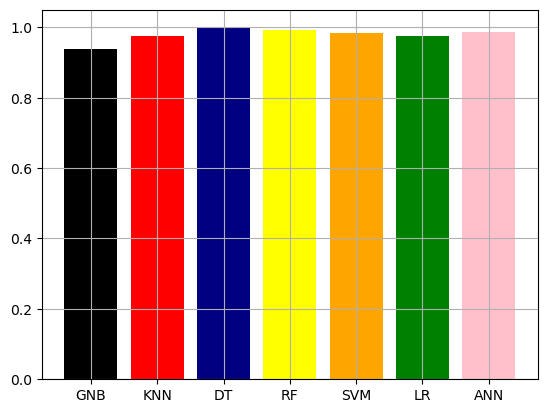

In [33]:

import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'red', 'navy', 'yellow', 'orange', 'green', 'pink']

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

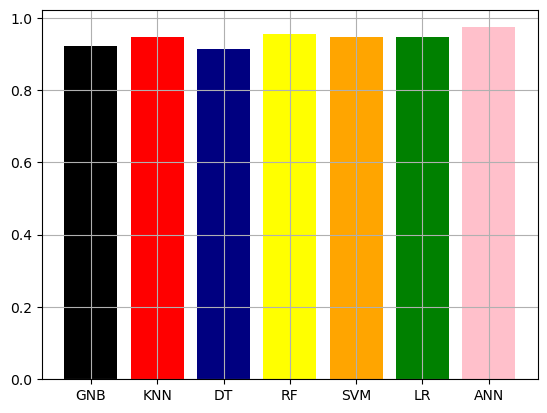

In [32]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'red', 'navy', 'yellow', 'orange', 'green', 'pink']

plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

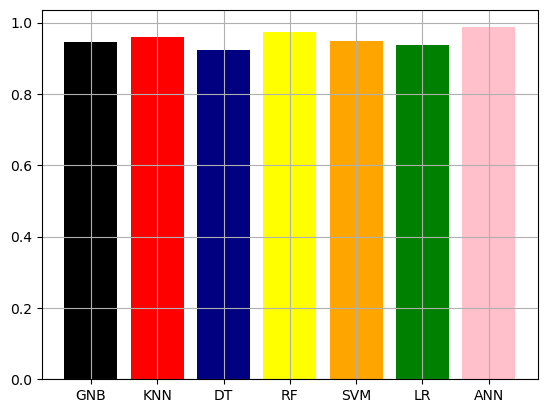

In [34]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'red', 'navy', 'yellow', 'orange', 'green', 'pink']

plt.bar(title, p, color=colors)
plt.grid()
plt.show()

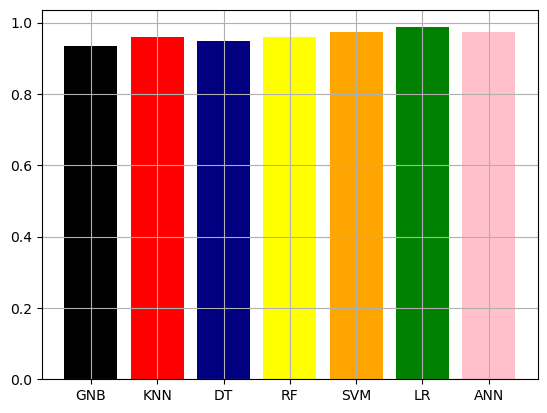

In [35]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['black', 'red', 'navy', 'yellow', 'orange', 'green', 'pink']

plt.bar(title, r, color=colors)
plt.grid()
plt.show()